
<div style="text-align: center">

# <h1>**<font color="#004FBF" size=7>Travel Insurance Prediction</font>**</h1>
<br><br>

<div style="text-align: right">

**<font color="#004D9F" size=4>[Ael-Dev]</font><br>**

<a id="section1"></a>
## **<font color="#004F9F"> 1. Business Understanding</font>**
---


### <font color="#004F9F"> Problem Statement</font>

A tour and travel company wants to offer a new insurance package to its customers that includes COVID cover. The company wants to identify which customers would be interested in buying this package based on their database history. The data is provided for almost 2000 previous customers, and the goal is to build an intelligent model that can predict if a customer will be interested in buying the travel insurance package based on certain parameters.


### <font color="#004F9F"> Plan of Action</font>

1. Data Collection and Understanding
- Obtain the dataset provided by the tour and travel company.
- Understand the meaning and relevance of each feature in the dataset.
- Identify any data quality issues such as missing values or outliers.
2. Data Preprocessing
- Perform data cleaning by handling missing values and outliers appropriately.
- Encode categorical variables using one-hot encoding or label encoding.
- Normalize numerical features to ensure all features have the same scale.
- Split the dataset into training and testing sets.
3. Exploratory Data Analysis (EDA)
- Visualize the distribution of features to gain insights.
- Analyze correlations between features and the target variable.
- Identify patterns and trends in the data that could influence customer interest.
4. Feature Engineering
- Create new features if necessary to enhance model performance.
- Select relevant features that have the most impact on predicting customer interest.
5. Model Selection and Training
- Choose a suitable machine learning algorithm such as XGBoost for classification.
- Train the model on the training dataset.
- Evaluate the model using cross-validation techniques to ensure robust performance.
6. Model Evaluation and Optimization
- Evaluate the model using metrics like accuracy, precision, recall, and F1 score.
- Optimize the model by tuning hyperparameters to improve performance.
- Use techniques like grid search or random search for hyperparameter tuning.
7. Model Validation
- Validate the model on the testing dataset to assess its generalization ability.
- Ensure the model performs well on unseen data to make reliable predictions.
8. Model Deployment
- Implement user interface elements in a web application.
- Provide a user-friendly interface.
- Deploy the final model.

### <font color="#004F9F"> Goal</font>

The goal of this project is to build an intelligent model that can predict if a customer will be interested in buying the travel insurance package based on the given parameters. This will help the company target its marketing efforts and increase the sales of the new insurance package.


### <font color="#004F9F">Data Description</font>

[Source: Kaggle](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data?select=TravelInsurancePrediction.csv)

The dataset includes the following features:

- Age: Age of the customer.
- Employment Type: The sector in which the customer is employed.
- GraduateOrNot: Whether the customer is a college graduate or not.
- AnnualIncome: The yearly income of the customer in Indian Rupees (rounded to the nearest 50 thousand rupees).
- FamilyMembers: Number of members in the customer's family.
- ChronicDisease: Whether the customer suffers from any major diseases or conditions like diabetes, high BP, asthma, etc.
- FrequentFlyer: Derived data based on the customer's history of booking air tickets on at least four different instances in the last two years (2017-2019).
- EverTravelledAbroad: Has the customer ever travelled to a foreign country (not necessarily using the company's services)?
- TravelInsurance: Did the customer buy travel insurance package during the introductory offering held in the year 2019?

<a id="section2"></a>
## **<font color="#004F9F"> 2. Data Collection</font>**
---

### <font color="#004F9F">Load Dataset</font>

In [46]:
import pandas as pd

df_raw = pd.read_csv("TravelInsurancePrediction.csv", sep=',')
df_raw.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [47]:
df_raw.drop(["Unnamed: 0"], axis=1, inplace=True)

### <font color="#004F9F">Overview Information</font>

In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [49]:
# more information
from funpymodeling.exploratory import status

status(df_raw)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,11,int64
1,Employment Type,0,0.0,0,0.000000,2,object
2,GraduateOrNot,0,0.0,0,0.000000,2,object
3,AnnualIncome,0,0.0,0,0.000000,30,int64
4,FamilyMembers,0,0.0,0,0.000000,8,int64
5,ChronicDiseases,0,0.0,1435,0.722194,2,int64
6,FrequentFlyer,0,0.0,0,0.000000,2,object
7,EverTravelledAbroad,0,0.0,0,0.000000,2,object
8,TravelInsurance,0,0.0,1277,0.642677,2,int64


In [50]:
from skimpy import skim

skim(df_raw)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1987   │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Age              │   0 │     0 │      30 │     2.9 │     25 │     28 │     29 │      32 │      35 │ ▃▇▂▃▃▅ │  │
│ │ AnnualIncome     │   0 │     0 │  930000 │  380000 │ 300000 │ 600000 │ 900000 │ 1200000 │ 1800000 │ ▆▇▆▇▇▁ │  │
│ │ FamilyMembers    │   0 │     0 │     4.8 │     1.6 │      2 │      4 │      5 │       6 │       9 │ ▇▇▇▅▃▂ │  │
│ │ ChronicDiseases  │   0 │     0 │    0.28 │    0.45 │      0 │      0 │      0 │       1 │       1 │ ▇    ▃ │  │
│ │ TravelInsurance  │   0 │     0 │    0.36 │    0.48 │      0 │      0 │      0 │       1 │       1 │ ▇    ▅ │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Employment Type                      │     0 │         0 │                      2.7 │                 5391 │  │
│ │ GraduateOrNot                        │     0 │         0 │                        1 │                 1987 │  │
│ │ FrequentFlyer                        │     0 │         0 │                        1 │                 1987 │  │
│ │ EverTravelledAbroad                  │     0 │         0 │                        1 │                 1987 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id="section3"></a>
## **<font color="#004F9F"> 3. Exploratory Data Analysis (EDA)</font>**
---

<Axes: xlabel='TravelInsurance'>

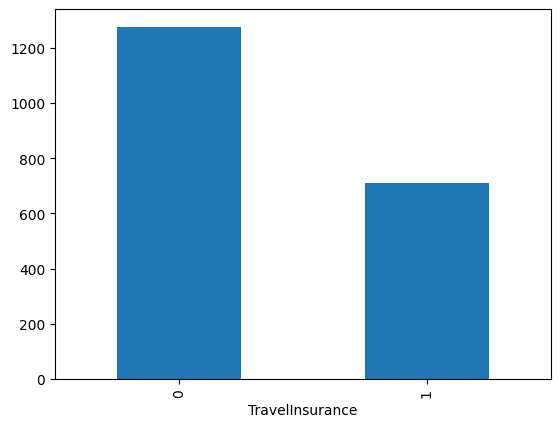

In [51]:
df_raw["TravelInsurance"].value_counts().plot(kind="bar")

c:\Users\Alex\miniconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alex\miniconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alex\miniconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Alex\miniconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119:

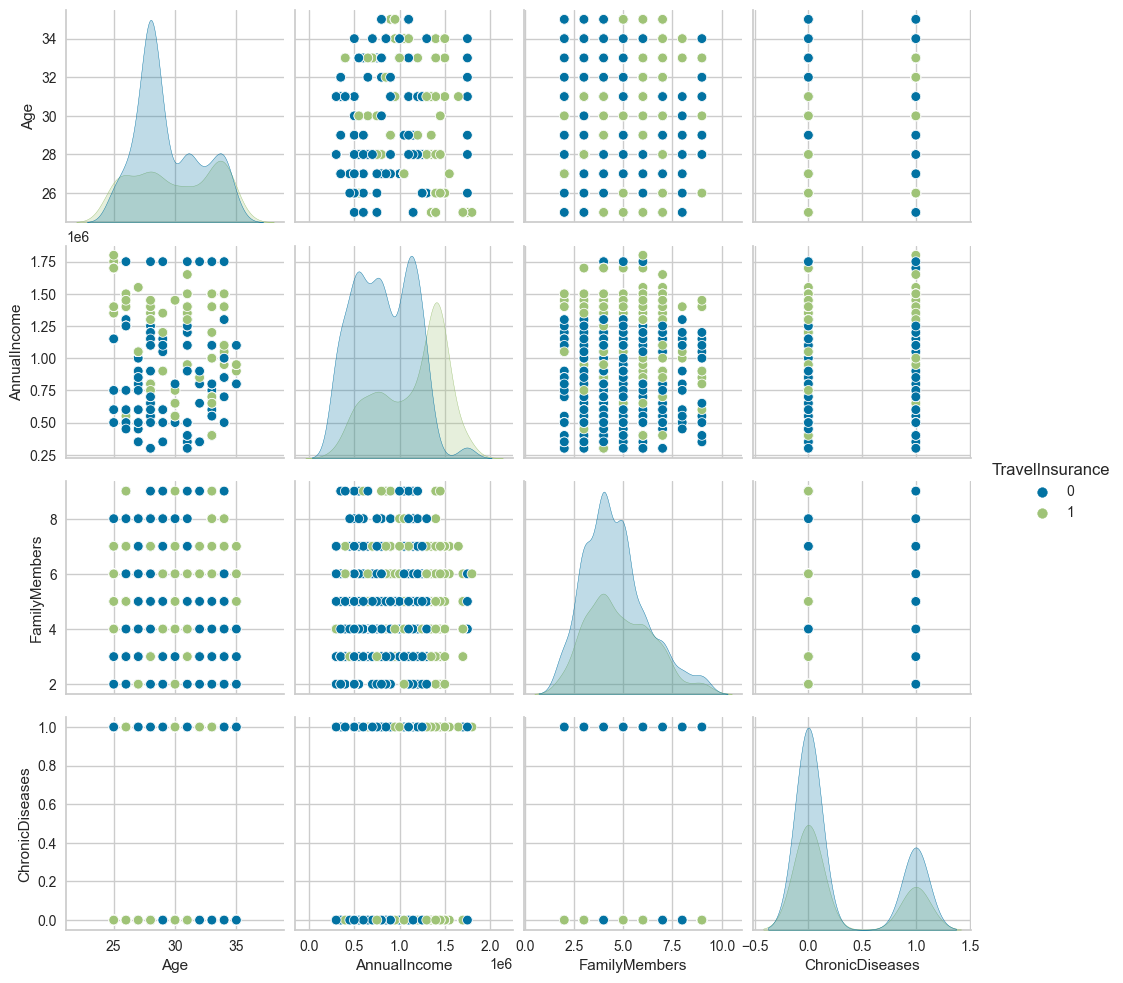

In [80]:
import seaborn as sns
import pandas as pd
import numpy as np

# Sample 50% of the data without replacement
sampled_data = df_raw.sample(frac=0.5, random_state=1)

# Now, create the pairplot with the sampled data
sns.pairplot(sampled_data, hue="TravelInsurance")




<a id="section3"></a>
## **<font color="#004F9F"> 4. Data Preparation</font>**
---

### <font color="#004F9F">Delete Unnecesary Columns</font>

In [52]:

# filter_data = df_raw.drop(['Sales_ID', 'name', 'State or Province', 'City','torque'], axis=1)
# filter_data.head()

### <font color="#004F9F">Change Categorical Values to Numeric</font>

In [53]:
# binary -> no/yes => 0/1

df_dummies = df_raw.copy(deep=True)

categories_map = {'No': 0, 'Yes': 1}
boolean_columns = ["GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad"]
for col_name in boolean_columns:
    df_dummies[col_name] = df_dummies[col_name].map(categories_map)


categories_map = {'Government Sector': 0, 'Private Sector/Self Employed': 1}
df_dummies["Employment Type"] = df_dummies["Employment Type"].map(categories_map)

df_dummies.sample(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1325,30,1,0,800000,4,0,0,0,1
1321,31,0,0,300000,7,0,0,0,0
1728,26,1,1,500000,6,0,0,0,0
1196,28,0,1,300000,2,0,0,0,0
273,34,1,1,1000000,6,0,1,0,1


### <font color="#004F9F">Rename Columns</font>

In [54]:
df_dummies.rename(columns={'Employment Type':'Employment_Type'}, inplace=True)

### <font color="#004F9F">Select variables for our UI (MVP)</font>

In [55]:
# filter_data2 = filter_data[['year', 'fuel', 'seats','transmission','Region','selling_price']].copy()
# filter_data2.sample(5)

In [56]:
# from sklearn.preprocessing import OneHotEncoder

# # Crear una instancia de OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)#, drop='first')

# # Seleccionar las columnas categóricas para la codificación
# categorical_columns = ['fuel', 'transmission', 'Region']
# encoded_columns = encoder.fit_transform(filter_data2[categorical_columns])

# # Crear un DataFrame con las columnas codificadas
# encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns)).astype('uint8')

# # Concatenar las columnas codificadas con el DataFrame original
# df_encoded = pd.concat([filter_data2.drop(categorical_columns, axis=1), encoded_columns_df], axis=1)

# df_encoded.head(5)

In [57]:
status(df_dummies)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,11,int64
1,Employment_Type,0,0.0,570,0.286865,2,int64
2,GraduateOrNot,0,0.0,295,0.148465,2,int64
3,AnnualIncome,0,0.0,0,0.000000,30,int64
4,FamilyMembers,0,0.0,0,0.000000,8,int64
5,ChronicDiseases,0,0.0,1435,0.722194,2,int64
6,FrequentFlyer,0,0.0,1570,0.790136,2,int64
7,EverTravelledAbroad,0,0.0,1607,0.808757,2,int64
8,TravelInsurance,0,0.0,1277,0.642677,2,int64


### <font color="#004F9F">Split in input and output (X / Y)</font>

In [58]:
df=df_dummies.copy()

X = df.drop('TravelInsurance',  axis=1)
y = df['TravelInsurance']

### <font color="#004F9F">Split in training and test data</font>

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Train shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)

Train shape:  (1589, 8)
Test Shape:  (398, 8)


<a id="section4"></a>
## **<font color="#004F9F"> 4. Model Building & Training</font>**
---

### <font color="#004F9F">Model Selection</font>

In [60]:
# select model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier()

### <font color="#004F9F">Fit</font>

In [61]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

<a id="section5"></a>
## **<font color="#004F9F"> 5. Evaluation Metrics</font>**
---

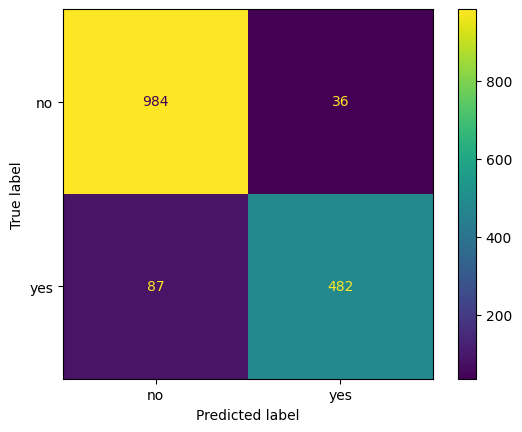

In [62]:
# confusion matrix
# absolute values
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model_rf, X_train, y_train,
    display_labels=['no','yes'],
    cmap='viridis'
);

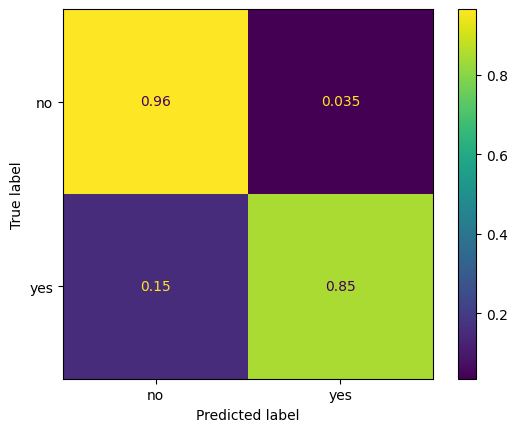

In [63]:
# % values
ConfusionMatrixDisplay.from_estimator(
    model_rf, X_train, y_train,
    display_labels=['no','yes'],
    cmap='viridis',
    normalize='true'
);

In [64]:
from sklearn.metrics import classification_report


# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       257
           1       0.79      0.64      0.71       141

    accuracy                           0.81       398
   macro avg       0.80      0.77      0.78       398
weighted avg       0.81      0.81      0.81       398



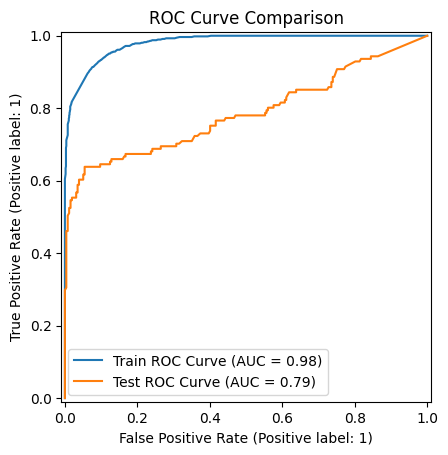

In [65]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Generate the ROC curve for the training set
tr_disp = RocCurveDisplay.from_estimator(model_rf, X_train, y_train)
tr_auc = roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1])
tr_disp.ax_.set_title('ROC Curve Comparison')
tr_disp.ax_.set_xlabel('False Positive Rate')
tr_disp.ax_.set_ylabel('True Positive Rate')
tr_disp.ax_.legend([f'Train ROC Curve (AUC = {tr_auc:.2f})'])

# Generate the ROC curve for the test set using the same axis
ts_disp = RocCurveDisplay.from_estimator(model_rf, X_test, y_test, ax=tr_disp.ax_)
ts_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
ts_disp.ax_.legend([f'Train ROC Curve (AUC = {tr_auc:.2f})', f'Test ROC Curve (AUC = {ts_auc:.2f})'])

# Display the plot
plt.show()


### <font color="#004F9F">Fine Tuning</font>

In [72]:
params = {
    'n_estimators': [100,250, 500],
    'max_features': [50, 100],
    #'bootstrap': ['True', 'False'],
    'max_depth':[50,500],
    # 'min_samples_leaf':[3,50],
    # 'min_samples_split':[10,50]
}

grid_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=params,
    scoring='accuracy',
    cv=2,
    verbose=1
)

### <font color="#004F9F">Fit</font>

In [73]:
grid_rf.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 500], 'max_features': [50, 100],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy', verbose=1)

In [74]:
# obtain best estimator
best_rf = grid_rf.best_estimator_

In [75]:

# Make predictions on the test set using the best_rf estimator
y_pred = best_rf.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.91      0.87       257
           1       0.81      0.65      0.72       141

    accuracy                           0.82       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.82      0.82      0.81       398



### <font color="#004F9F">Predictions</font>

In [76]:
grid_rf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

### <font color="#004F9F">Visualization</font>

<a id="section6"></a>
## **<font color="#004F9F"> 6. Save Artifacts</font>**
---

In [68]:
# save and load stucture or transformations

# import pickle
# import os

# # Specify the directory where you want to save the model
# directory = '../artifacts'

# categories_ohe = 'categories_ohe.pkl'
# full_path = os.path.join(directory, categories_ohe)

# # columns
# list_cat_ohe = X_train.columns

# # Ensure the directory exists
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Save the model to the specified directory with exception handling
# try:
#     with open(full_path, "wb") as handle:
#         pickle.dump(list_cat_ohe, handle, protocol=pickle.HIGHEST_PROTOCOL)
# except Exception as e:
#     print(f"Error saving the columns: {e}")

# # Load the model from the specified directory with exception handling
# try:
#     with open(full_path, "rb") as handle:
#         loaded_categories_ohe = pickle.load(handle)
# except Exception as e:
#     print(f"Error loading the model: {e}")


In [81]:
# save and load the model

import pickle
import os

# Specify the directory where you want to save the model
directory = '../artifacts/model'
model_name = 'model.pkl'
full_path = os.path.join(directory, model_name)

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model to the specified directory with exception handling
try:
    with open(full_path, "wb") as file:
        pickle.dump(grid_rf, file)
except Exception as e:
    print(f"Error saving the model: {e}")

# Load the model from the specified directory with exception handling
try:
    with open(full_path, "rb") as file:
        loaded_model = pickle.load(file)
except Exception as e:
    print(f"Error loading the model: {e}")

Conclusion:

This project aims to help the tour and travel company identify potential customers for its new insurance package that includes COVID cover. By building an intelligent model that can predict customer interest based on certain parameters, the company can target its marketing efforts and increase the sales of the new package. The project will also provide insights into the factors that influence customer interest in travel insurance packages.